<a href="https://colab.research.google.com/github/mlvlab/vision-tutorial/blob/master/5_Object_Detection_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Session #5: Object Detection**


by Sihyeon Kim (mlv lab @ Korea University) on October 2019

for SKC Lecture, Fall 2019 (Prof. Hyunwoo J. Kim)


---
**Contents**
1. Object Detection Tutorial: Inference with a pretrained model
2. Finetuning a pretrained model for certain purpose


**Reference**

* [Object Detection Tutorial](https://www.learnopencv.com/faster-r-cnn-object-detection-with-pytorch/)


* [Object Detection Finetuning](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html#)

---




# 1. Object Detection Tutorial: Inference with a pretrained model



*   Faster R-CNN: one of the famous two-stage object detection network
*   We will use Faster R-CNN with ResNet-50 + FPN as backbone network



In [0]:
import os
import numpy as np
import torch
import torchvision
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms as T

In [0]:
# Download a pretrained model
model_pretrained = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Inference
model_pretrained.eval()

In [0]:
# Define the class names given by PyTorch’s official Docs

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [0]:
# function to get the prediction of the test image

def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model_pretrained([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

In [0]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=2, text_th=3):
 
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
    cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  plt.figure(figsize=(8,14)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [6]:
!wget https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg -O people.jpg

--2019-10-07 16:19:52--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘people.jpg’

people.jpg          100%[===================>]   1.83M  7.56MB/s    in 0.2s    

2019-10-07 16:19:52 (7.56 MB/s) - ‘people.jpg’ saved [1923610/1923610]



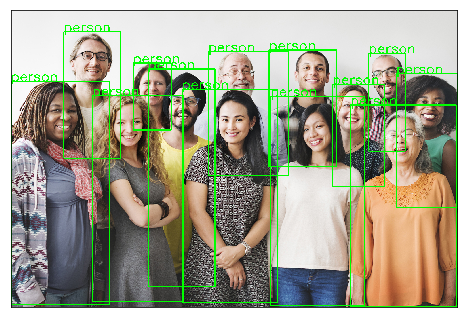

In [7]:
object_detection_api('people.jpg', threshold=0.8)

In [0]:
object_detection_api('people.jpg', threshold=0.2)

In [0]:
!wget https://images.unsplash.com/photo-1458169495136-854e4c39548a -O girl_cars.jpg

In [0]:
object_detection_api('girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8)